# Project 3: Root-finding
This project deals with root-finding methods

## Objective:
1. Using <code>sympy</code>, find how many roots exist and their values in the function $f(x)=1+x^{2}$ for $x\in \mathbb{R}$.
    1. Find an _exact_ expression for the two initial starting points for a Newton-Raphson algorithm such that successive iterations oscillate with a period of 2. 

2. Using a bisection algorithm on the function $f(x)=x(x+\delta)^{-2}$ with $\delta=10^{-4}$.
    1. What is the performance of the algorithm on the initial points $(-1.0, 1.6)$.

3. Modify the bisection method in #2 to a false position algorithm and perform a root-finding analysis on the function $f(x)=\sin(x)$ and the initial bracketing points at $(0, 0.16)$.
    1. Compare with the performance of the bisection algorithm with the same function.

4. Use the false position algorithm on the function $g(x)=\delta+x^{n}$ with $\delta=-0.001$ and $n=20$ and the initial bracketing points at $(0, 1)$
    1. Plot the function.

## Solutions:

1. Given the following function

$$f(x)=1+x^{2}$$

Roots occur when $f(x)=0$, so we can set up our program with the relevant packages

In [254]:
import numpy as np
import math as m
import sympy as sym
import matplotlib as mpl
import matplotlib.pyplot as plt

from sympy.plotting import plot

plt.style.use('seaborn-v0_8-notebook')


We assume that the nature of $x$ is unknown (by observation it is complex but let's pretend as if we are unaware), so we define a symbol

In [255]:
x = sym.Symbol('x')

The function is evaluated at the x-intercept where $f(x)=0$, so we define an equation

In [256]:
equation = sym.Eq(0, 1+x**2)
equation

Eq(0, x**2 + 1)

and the solutions of this equation are

In [257]:
solutions = sym.solve(equation, x)
solutions

[-I, I]

These are not real solutions, and so the NRM would not converge to a desired tolerance. Instead, we would expect it to oscillate about the minimum forever (assuming there is no max iteration). In order to locate the point where successive iterations oscillate with a period of 2, we locate a point along the x-axis $x_{n}$ that satisfies the condition $x_{n}=-x_{n+1}$. We start bylooking at the point $x_{0}$ that creates a line tanget to that point on the curve

In [258]:
x0 = sym.Symbol('x_{0}')
f = 1+x**2
g = sym.diff(f,x)


In [259]:
f0 = f.subs(x,x0)
f0

x_{0}**2 + 1

In [260]:
g0 = g.subs(x,x0)
g0

2*x_{0}

The tangent line is given by the point-slope formula

$$f(x)-f(x_{0})=f^{\prime}(x_{0})(x-x_{0})$$

In [261]:
fx = sym.Function('f')(x)

psf = sym.Eq(fx-f0, g0*(x-x0))
psf

Eq(-x_{0}**2 + f(x) - 1, 2*x_{0}*(x - x_{0}))

Now we do a couple steps at once:
1. We look for when the tangent line crosses the x-axis $f(x)$
2. At the next step $n$, we assert that $x_{n+1}=-x_{n}$ so $x_{1}=-x_{0}$
3. We solve for the value of $x_{0}$ at $f(x)=0$

In [262]:
tangent = sym.solve(psf, fx)[0]
tangent

2*x*x_{0} - x_{0}**2 + 1

In [263]:
solutions = sym.solve(sym.Eq(sym.solve(psf, fx)[0].subs(x, -x0), 0), x0)
solutions

[-sqrt(3)/3, sqrt(3)/3]

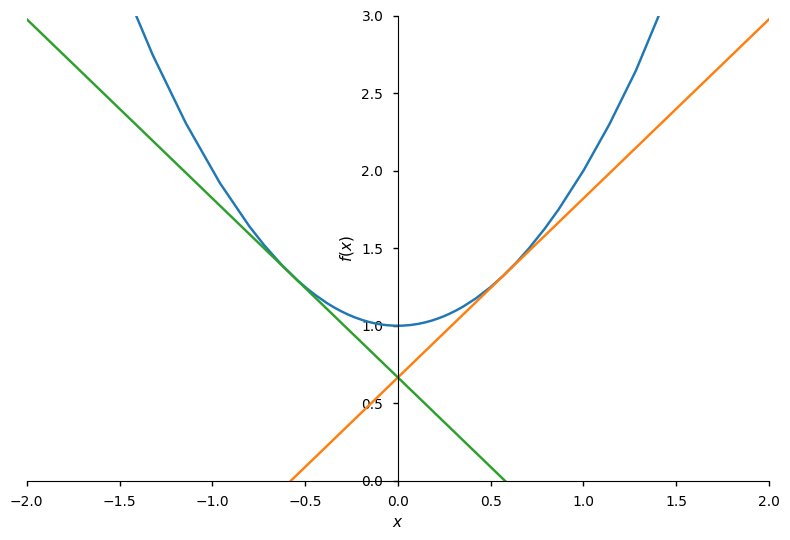

In [264]:
p1 = plot(f, show=False, xlim=(-2, 2), ylim=(0,3))
p2 = plot(tangent.subs(x0, solutions[1]), show=False)
p3 = plot(tangent.subs(x0, solutions[0]), show=False)

p1.append(p2[0])
p1.append(p3[0])

p1.show()

2. We will develop a bisection method to evaluate the roots of the function

$$f(x)=x(x+\delta)^{-2}\text{~ with ~}\delta=10^{-4}.$$

The bisection method is an algorithm that determines an interval given some end-points, and subdivides the the interval where a root resides. This is defined as the point where the sign of the product of two successive iterations is negative. At this point, the average of the successive iterations is compared to a tolerance, and the algorithm is terminated once that tolerance is reached. This is visualized with the image below from <a href="https://en.wikipedia.org/wiki/Bisection_method#/media/File:Bisection_method.svg">this source</a>

<img src="bisection.png"
     alt="A continuous function is split into intervals containing the root."
     width="350"
     height="450" />

The definition of the algorithm is simple

In [265]:
def bisection(function, start, end, tolerance =1e-10):
    # Start with the function, and its endpoints. We define a built-in tolerance that can be adjusted
    
    fa, fb = function(start), function(end)
    # Start by looking at the signs of the function at the end-points
    
    evaluations = 0 # The start of the counter
    
    if fa*fb >= 0:
        # If the product of the function at the endpoints is positive, the method fails
        print('Bisection fails.')
        return None, evaluations

    while (end-start)/2 > tolerance:
        # While above some tolerance do:
        
        evaluations += 1 # Step the counter
        
        midpoint = (start+end)/2 # Find the midpoint of the endpoints
        fm = function(midpoint) # Evaluate the function at the midpoint
        
        if function(start)*fm < 0:
            # If the product of the function at the start and midpoint is negative
            end = midpoint # Set the new end point
            
        elif function(end)*fm < 0:
            # If the product of the function at the end and midpoint is negative
            start = midpoint # Set the new start point

        elif fm == 0:
            # If the function at the midpoint is zero
            return midpoint, evaluations # This is the solution
        
    return (start+end)/2, evaluations

Now we can define out function and use the precision of our computer to determine a root within the bounds $(-1.0, 1.6)$

In [266]:
delta = 1e-4
function = lambda x: x*(x+delta)**(-2)
start, stop, epsilon = -1.0, 1.6, np.finfo(float).eps
root, max_iter = bisection(function, start, stop, epsilon)
print(f"The root is found to be {root} at {max_iter} iterations.")

The root is found to be 8.967185968126265e-17 at 53 iterations.


The following relation gives us insight on the expected maximum iterations

$$\left|x_{n}-x\right|\leq \frac{1}{2^{n}}\left|x_{1}-x_{0}\right|.$$

The LHS is the tolerance we desire for the algorithm, which is given by the machine precision, whereas the RHS has the number of iterations $n$ and the left and right bounds $x_{0}$ and $x_{1}$. Plugging in these quantities and solving for $n$ shows the maximum number of iterations required for this algorithm 

In [267]:
n = sym.Symbol('n', integer=True)
LHS, RHS = sym.Abs(epsilon), sym.Rational(1, 2)**(n)*sym.Abs(stop-start)
sym.reduce_inequalities([LHS<=RHS], n)

n <= 36.9991648341446/log(2)

The above rational number evaluates to $53.4$ where $\log(2)$ is equivalent to $\ln(2)$. We therefore have achieved the desired performance of the algorithm.

3. 

In [276]:
def regula_falsi(function, start, end, tolerance = 1e-5, max_iter = 100):
    
    if function(start) * function(end) >= 0:
        raise ValueError("Function should have different signs at a and b")
    
    c = start
    fa = function(start)
    fb = function(end)
    for i in range(max_iter):
        c = (start * fb - end * fa) / (fb - fa)
        fc = function(c)
        if fc == 0 or abs(end - start) < tolerance:
            return c, i
        
        if function(start) * fc < 0:
            end = c
            fb = fc
        else:
            start = c
            fa = fc
    return c, i

In [287]:
root, max_iter = regula_falsi(m.sin, -0.01, 0.16, epsilon)
print(f"The root is found to be {root} at {max_iter} iterations.")

The root is found to be 0.0 at 3 iterations.
